#1. Data Description

In [91]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report,confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import randint
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#2. Data Preparation

In [92]:
# Import dataset. Display first 10 rows
superstore = pd.read_csv('superstore_data.csv')
superstore.head(10)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0
5,7348,1958,PhD,Single,71691.0,0,0,3/17/2014,0,336,...,240,32,43,1,4,7,5,2,1,0
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/2014,0,769,...,15,34,65,1,10,10,7,6,1,0
7,1991,1967,Graduation,Together,44931.0,0,1,1/18/2014,0,78,...,0,0,7,1,2,1,3,5,0,0
8,4047,1954,PhD,Married,65324.0,0,1,11/1/2014,0,384,...,21,32,5,3,6,2,9,4,0,0
9,9477,1954,PhD,Married,65324.0,0,1,11/1/2014,0,384,...,21,32,5,3,6,2,9,4,0,0


In [93]:
superstore['Risk_Status'] = superstore['Recency'].apply(lambda recency: "High Risk" if recency >= 30 else "Low Risk")

In [94]:
superstore['Risk_Status']

0        Low Risk
1        Low Risk
2        Low Risk
3        Low Risk
4        Low Risk
          ...    
2235    High Risk
2236    High Risk
2237    High Risk
2238    High Risk
2239    High Risk
Name: Risk_Status, Length: 2240, dtype: object

In [95]:
# Display number of rows & columns
superstore.shape

(2240, 23)

In [96]:
# Assessing variable types
superstore.dtypes

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
Risk_Status             object
dtype: object

In [97]:
# Dropping unneccesary variables columns, modify if needed
superstore = superstore.drop(['Id','Year_Birth','Dt_Customer','Recency'],axis=1)

In [98]:
# Check for missing values
superstore.isnull().sum() #sum the number of rows that has missing/null values

Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
Risk_Status             0
dtype: int64

In [99]:
# Drop the missing values
superstore = superstore.dropna(axis=0) # dropna: remove missing values from the dataset, axis=0 means dropping by rows.

In [100]:
# Check for missing values after removing na
superstore.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
Risk_Status            0
dtype: int64

In [101]:
# Check for balance in target variable
superstore['Risk_Status'].value_counts(normalize=True)

High Risk    0.690433
Low Risk     0.309567
Name: Risk_Status, dtype: float64

There are 70% customers in this dataset that belong to high-risk category (not returning after 30 days), and 30% that belong to low-risk category (most recent purchase is under 30 days).

In [102]:
# Changing categorical variables into 'category' types
superstore['Education'] = superstore['Education'].astype('category')
superstore['Marital_Status'] = superstore['Marital_Status'].astype('category')
superstore['Risk_Status'] = superstore['Risk_Status'].astype('category')

In [103]:
superstore['is_high_risk'] = superstore['Risk_Status'].map({'High Risk': 1, 'Low Risk': 0})

In [104]:
superstore.describe()

,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.150271,0.009477
std,25173.076661,0.536896,0.544181,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.357417,0.096907
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,51381.500000,0.000000,0.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,68522.000000,1.000000,1.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,666666.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


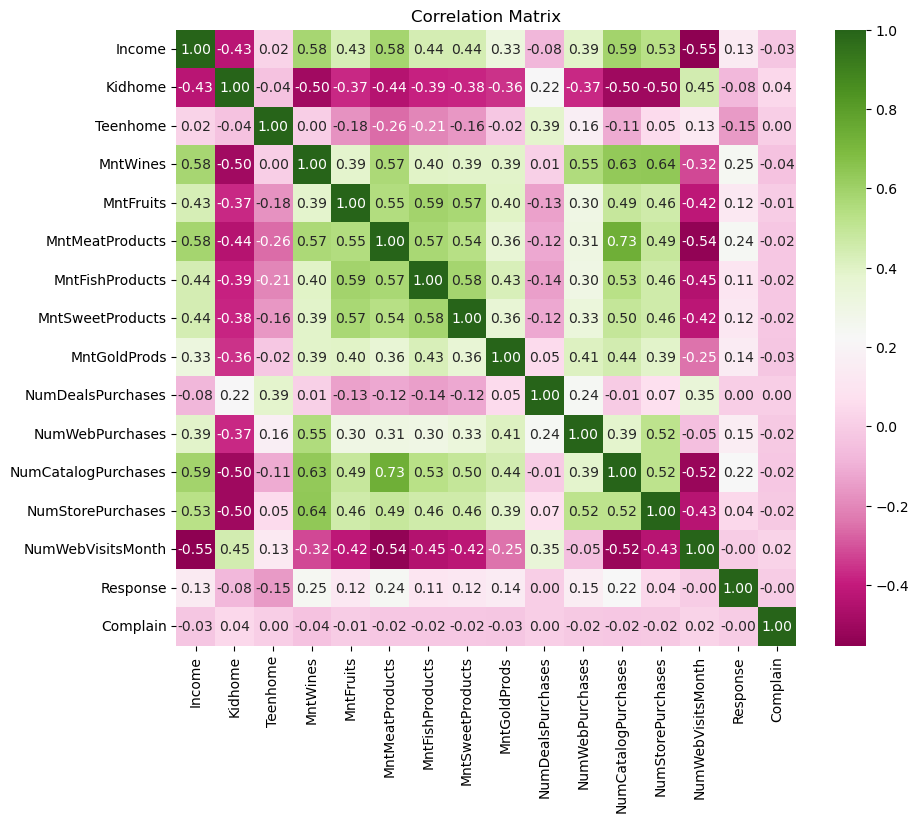

In [105]:
# Examine Correlations between numeric variables for Multicollinearity
# select_dtypes(include=['number']) selects only numeric variables, corr() display correlation
df_corr = superstore.select_dtypes(include=['number']).corr()

# Plotting the heatmap for correlation
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap='PiYG')
plt.title('Correlation Matrix')
plt.show()

In [106]:
superstore = superstore.drop(['MntMeatProducts'],axis=1)

#3. Data Visualization

We want to examine if there're any differences in distributions of data among the low and high-risk customers for some variables.

<Axes: xlabel='Risk_Status', ylabel='count'>

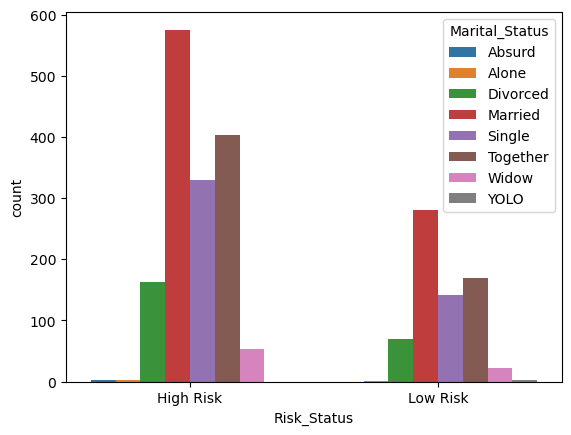

In [107]:
# Risk category and Marital Status
sns.countplot(x="Risk_Status",hue="Marital_Status",data=superstore)

<Axes: xlabel='Risk_Status', ylabel='count'>

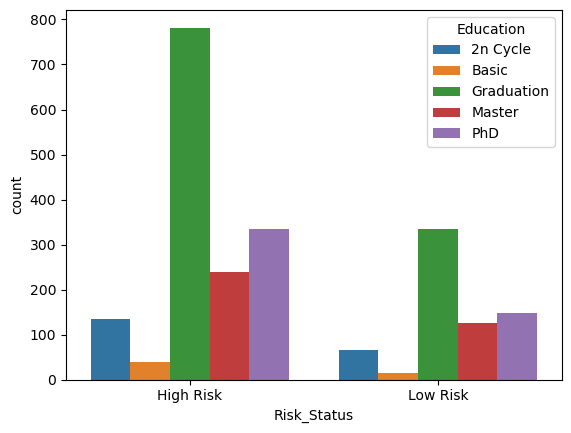

In [108]:
sns.countplot(x='Risk_Status',hue='Education',data=superstore)

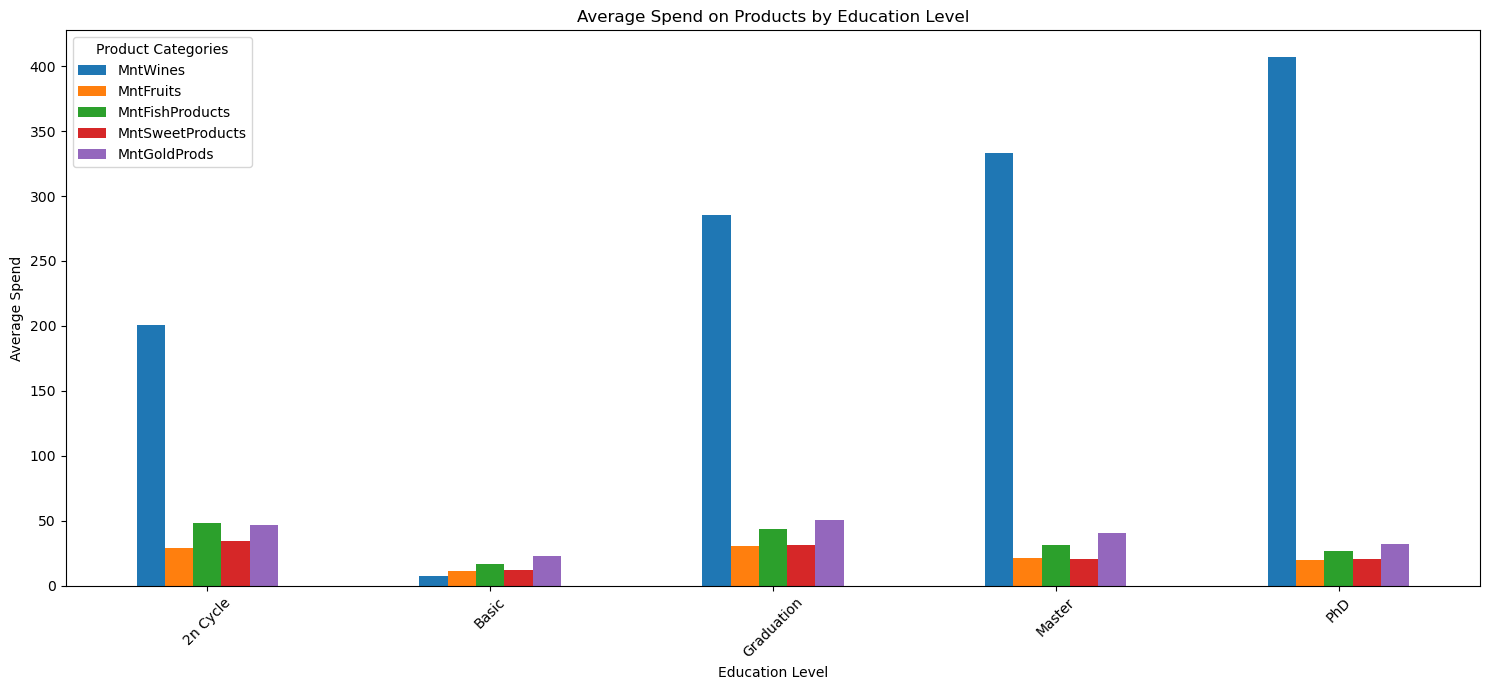

In [109]:
grouped_data = superstore.groupby('Education')[['MntWines', 'MntFruits','MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

# Now, plot the data
grouped_data.plot(kind='bar', figsize=(15, 7), stacked=False)

plt.title('Average Spend on Products by Education Level')
plt.ylabel('Average Spend')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.legend(title='Product Categories')
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

Based on the charts, I will drop Education and Marital Status because they don't really show any differences in distribution among the High and Low Risk of Churn.

In [110]:
df = superstore.drop(['Education','Marital_Status','Risk_Status'],axis=1)

#4. Model Building



1. Dummy Coding Variables for categorical variables (if applicable).
2. Define x & y
3. Splitting into training/testing
4. Fit the model
5. Performance Assessment with Confusion Matrix
6. Find the optimal number of splits and leaves
7. Refit the model
8. Performance Assessment



In [111]:
# Define X and Y
y =df.is_high_risk
x=df.drop(['is_high_risk'], axis=1)

In [112]:
# Splitting data into testing and training set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=23823)

In [113]:
# Check for balance in target variable in training & testing set
print("Training:", ytrain.value_counts(normalize=True))
print("Testing:", ytest.value_counts(normalize=True))

Training: 1    0.690745
0    0.309255
Name: is_high_risk, dtype: float64
Testing: 1    0.689189
0    0.310811
Name: is_high_risk, dtype: float64


In [114]:
# Decision Tree Model

tree1 = DecisionTreeClassifier(criterion="entropy",max_depth=3, min_samples_split=50, min_samples_leaf=25)
tree1.fit(xtrain, ytrain)

# Predict the target in the test data and display accuracy rate
pred1 = tree1.predict(xtest)

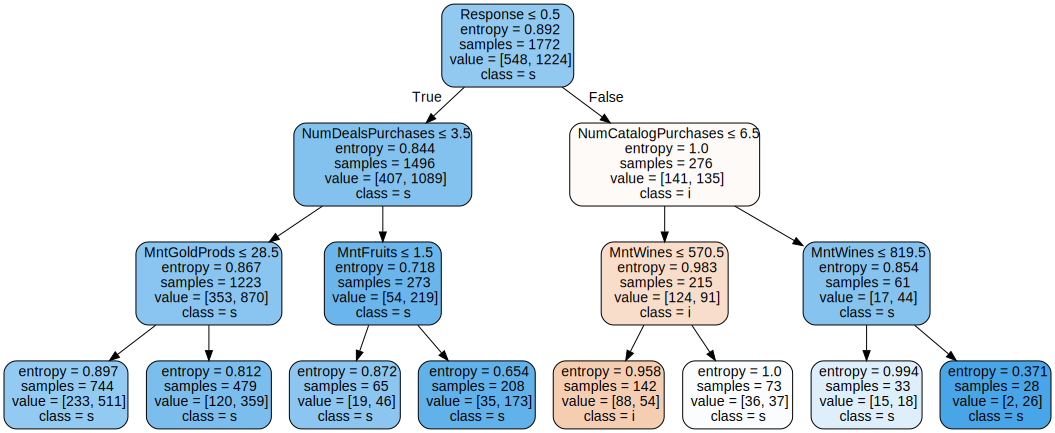

In [115]:
# Create a visualization of the decision tree
dot_data = export_graphviz(tree1, out_file=None, 
                           feature_names=x.columns,  
                           class_names=y.name,
                           filled=True, rounded=True, 
                           special_characters=True
                           )  

# Modify the dot data to increase font size and adjust graph size
dot_data = dot_data.replace('fontsize=10', 'fontsize=12')
dot_data = dot_data.replace('nodesep=0.1', 'nodesep=0.5')  # Increase node separation
dot_data = dot_data.replace('ranksep=0.1', 'ranksep=0.5')  # Increase rank separation

# Create a graph from the modified dot data
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render('decision_tree_visualization', cleanup=True)


graph

In [116]:
# Performance Evaluation

print("Accuracy for tree:",accuracy_score(ytest, pred1))
print("Classification Report:", "\n", classification_report(ytest,pred1))

Accuracy for tree: 0.6914414414414415
Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.11      0.18       138
           1       0.70      0.95      0.81       306

    accuracy                           0.69       444
   macro avg       0.61      0.53      0.49       444
weighted avg       0.65      0.69      0.61       444



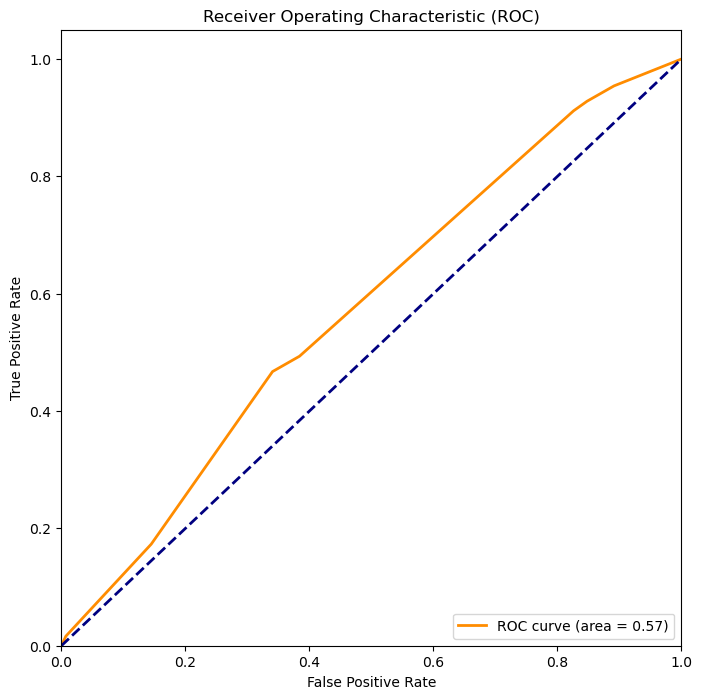

In [117]:
# Instead of using predict, use predict_proba to get the probabilities
probas_ = tree1.predict_proba(xtest)[:, 1]  # We are interested in the probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(ytest, probas_)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [118]:
# Hyperparameter tuning for decision tree
# Create the parameter grid and fit the model

tree_param = {'max_depth': range(5,16,5), 'min_samples_leaf': range(50,151,30),
         'min_samples_split': range(50,151,30), 'criterion': ["entropy"]}
tree2 = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=tree2, param_grid=tree_param, cv=5, verbose = 1)
grid_search.fit(xtrain, ytrain)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': range(5, 16, 5),
                         'min_samples_leaf': range(50, 151, 30),
                         'min_samples_split': range(50, 151, 30)},
             verbose=1)

In [119]:
# CV results
result = pd.DataFrame(grid_search.cv_results_)
result.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010376,0.002618,0.005033,0.002923,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.690141,0.670423,0.69209,0.683616,0.720339,0.691322,0.016372,26
1,0.006574,0.002176,0.002533,0.001212,entropy,5,50,80,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.690141,0.670423,0.69209,0.683616,0.720339,0.691322,0.016372,26


In [120]:
# print the optimal accuracy score and hyperparameters

print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.7065441234980504
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=80,
                       min_samples_split=50)


In [121]:
# Refit the decision tree model with optimal hyperparameters
tree2 = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_leaf=80,
                           min_samples_split=50, random_state=123)
tree2.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=80,
                       min_samples_split=50, random_state=123)

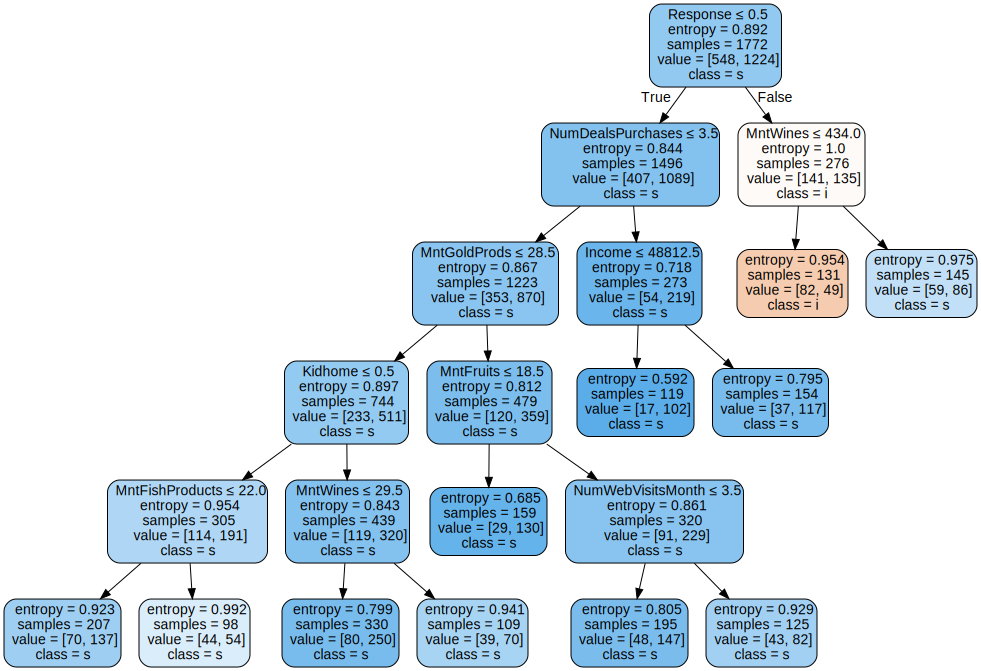

In [122]:
# Create a visualization of the decision tree
dot_data = export_graphviz(tree2, out_file=None, 
                           feature_names=x.columns,  
                           class_names=y.name,
                           filled=True, rounded=True, 
                           special_characters=True
                           )  

# Modify the dot data to increase font size and adjust graph size
dot_data = dot_data.replace('fontsize=10', 'fontsize=12')
dot_data = dot_data.replace('nodesep=0.1', 'nodesep=0.5')  # Increase node separation
dot_data = dot_data.replace('ranksep=0.1', 'ranksep=0.5')  # Increase rank separation

# Create a graph from the modified dot data
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render('decision_tree_visualization', cleanup=True)


graph

In [123]:
# Predict the target in the test data and display accuracy rate
pred2 = tree2.predict(xtest)

In [124]:
# Performance Evaluation

print("Accuracy for tree:",accuracy_score(ytest, pred2))
print("Classification Report:", "\n", classification_report(ytest,pred2))

Accuracy for tree: 0.6959459459459459
Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.13      0.21       138
           1       0.71      0.95      0.81       306

    accuracy                           0.70       444
   macro avg       0.63      0.54      0.51       444
weighted avg       0.66      0.70      0.62       444



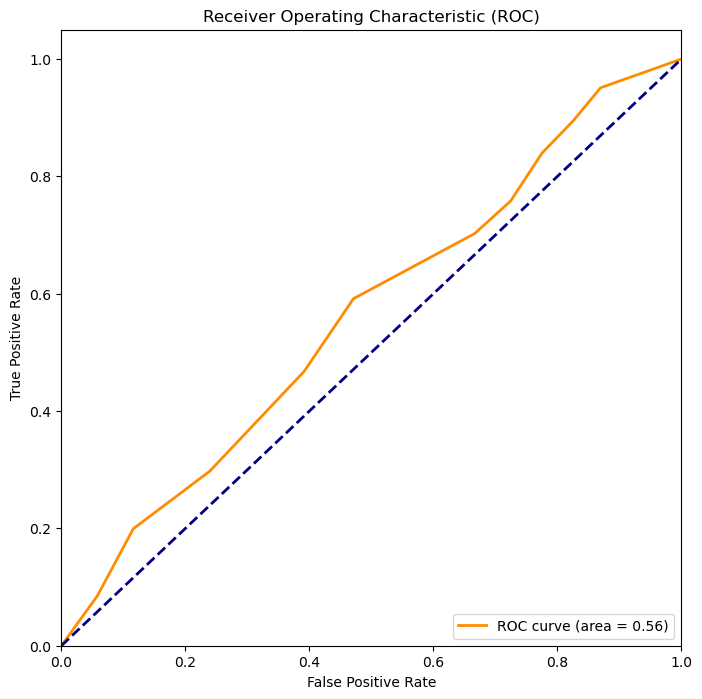

In [125]:
# Instead of using predict, use predict_proba to get the probabilities
probas_ = tree2.predict_proba(xtest)[:, 1]  # We are interested in the probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(ytest, probas_)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [126]:
#Random Forest
rf1 = RandomForestClassifier(max_features=5, random_state=20)
rf1.fit(xtrain, ytrain)
pred1 = rf1.predict(xtest)

In [127]:
# Performance Evaluation for Random Forest without Tuning

print("Accuracy for Random Forest:",accuracy_score(ytest, pred1))
print("Classification Report:", "\n", classification_report(ytest,pred1))

Accuracy for Random Forest: 0.6914414414414415
Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.20      0.29       138
           1       0.72      0.91      0.80       306

    accuracy                           0.69       444
   macro avg       0.61      0.56      0.55       444
weighted avg       0.65      0.69      0.64       444



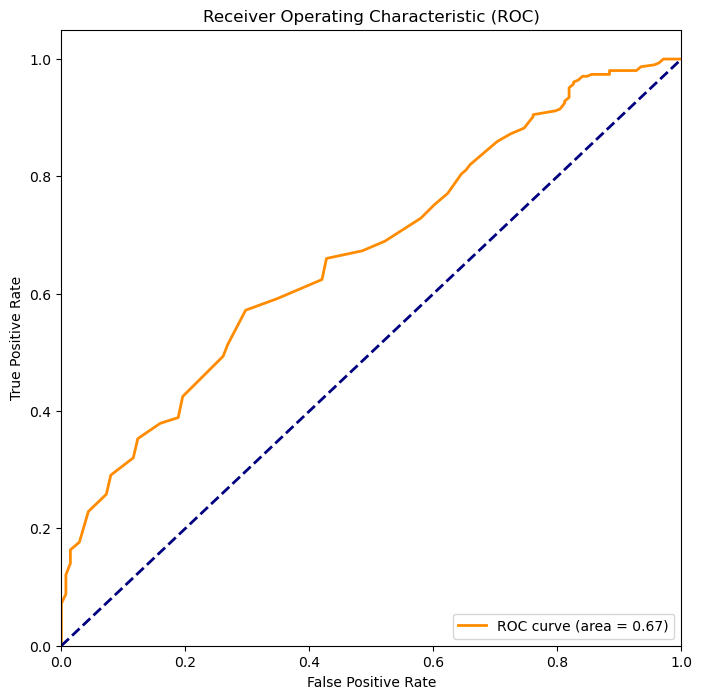

In [128]:
# Instead of using predict, use predict_proba to get the probabilities
probas_ = rf1.predict_proba(xtest)[:, 1]  # We are interested in the probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(ytest, probas_)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [129]:
# Use random search to find the best hyperparameters (It will take some time)

rf2 = RandomForestClassifier()
rf_param = {'n_estimators': randint(50,200), 'max_depth': randint(5,20)}
search=RandomizedSearchCV(rf2, param_distributions = rf_param, n_iter=5, cv=10).fit(xtrain, ytrain)

In [130]:
# Create a variable for the best model
rf_best = search.best_estimator_
print('Best hyperparameters for Random Forest:',  search.best_params_)

Best hyperparameters for Random Forest: {'max_depth': 19, 'n_estimators': 190}


In [131]:
var_importance = pd.DataFrame({'importance': rf_best.feature_importances_}, index=x.columns)
var_importance.sort_values(by='importance', ascending=False)

,importance
Income,0.127275
MntWines,0.120994
MntGoldProds,0.114931
MntFishProducts,0.099034
MntSweetProducts,0.091158
MntFruits,0.090698
NumWebVisitsMonth,0.060976
NumStorePurchases,0.058692
NumWebPurchases,0.057416
NumCatalogPurchases,0.050607


In [132]:
pred2 = rf_best.predict(xtest)

In [133]:
# Performance Evaluation for Random Forest with Hyperparameter Tuning

print("Accuracy for Random Forest:",accuracy_score(ytest, pred2))
print("Classification Report:", "\n", classification_report(ytest,pred2))

Accuracy for Random Forest: 0.7162162162162162
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.23      0.34       138
           1       0.73      0.93      0.82       306

    accuracy                           0.72       444
   macro avg       0.67      0.58      0.58       444
weighted avg       0.69      0.72      0.67       444



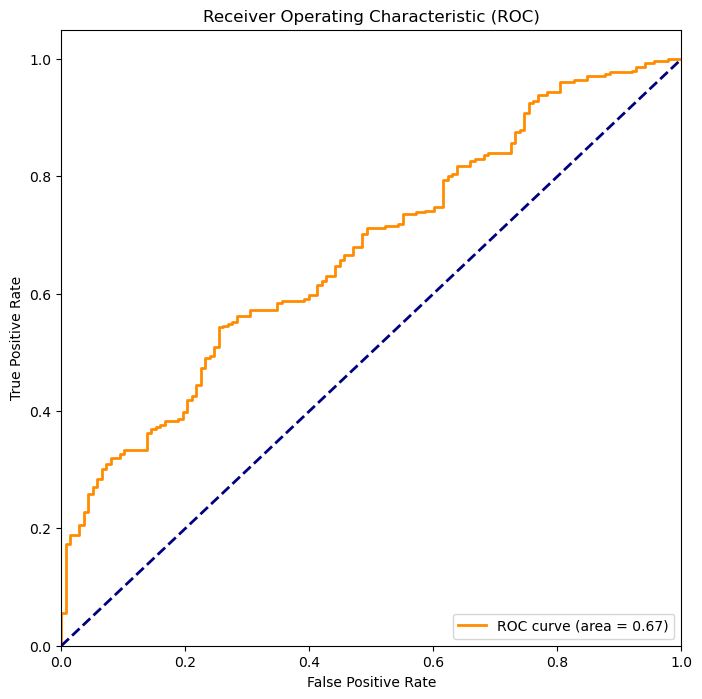

In [134]:
# Instead of using predict, use predict_proba to get the probabilities
probas_ = rf_best.predict_proba(xtest)[:, 1]  # We are interested in the probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(ytest, probas_)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [135]:
!jupyter nbconvert --to html "/content/drive/MyDrive/MKTG 677/Project/Superstore.ipynb"

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/MKTG 677/Project/Superstore.ipynb' matched no files
